In [1]:
from pyforest import *
train=pd.read_csv("bigdatamart_Train.csv")#load the dataset
test=pd.read_csv("bigdatamart_Test.csv")
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [2]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
#lets merge both train and test data set
df=pd.concat([train,test],sort=False)

<IPython.core.display.Javascript object>

In [5]:
#check the shape of data set
df.shape

(14204, 12)

In [6]:
#now checking the columns
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [9]:
#check the null value
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

<IPython.core.display.Javascript object>

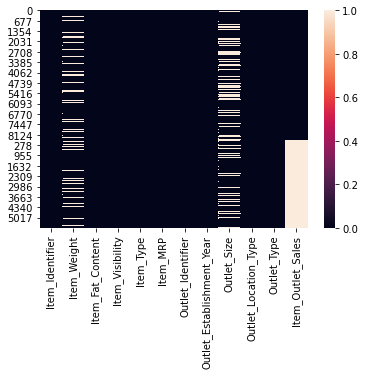

In [10]:
#now check the null value with heatmap
sns.heatmap(df.isnull())

In [11]:
#now removing the null value
col_to_impute=["Outlet_Size","Item_Weight","Item_Outlet_Sales"]
for col in col_to_impute:
    if df[col].dtype!="object":
        df[col].fillna(df[col].mean(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

<IPython.core.display.Javascript object>

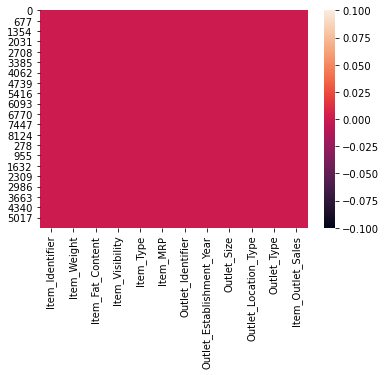

In [12]:
#Agin check the null value 
sns.heatmap(df.isnull())

In [13]:
col=df.columns
for i in col:
    print(df[i].describe(),df[i].dtypes)

count     14204
unique     1559
top       FDH04
freq         10
Name: Item_Identifier, dtype: object object
count    14204.000000
mean        12.792854
std          4.234226
min          4.555000
25%          9.300000
50%         12.792854
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64 float64
count       14204
unique          5
top       Low Fat
freq         8485
Name: Item_Fat_Content, dtype: object object
count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64 float64
count                     14204
unique                       16
top       Fruits and Vegetables
freq                       2013
Name: Item_Type, dtype: object object
count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.

In [14]:
df['Item_Outlet_Sales'].describe()

count    14204.000000
mean      2181.288914
std       1321.864430
min         33.290000
25%       1468.089000
50%       2181.288914
75%       2181.288914
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

# Data Vizualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

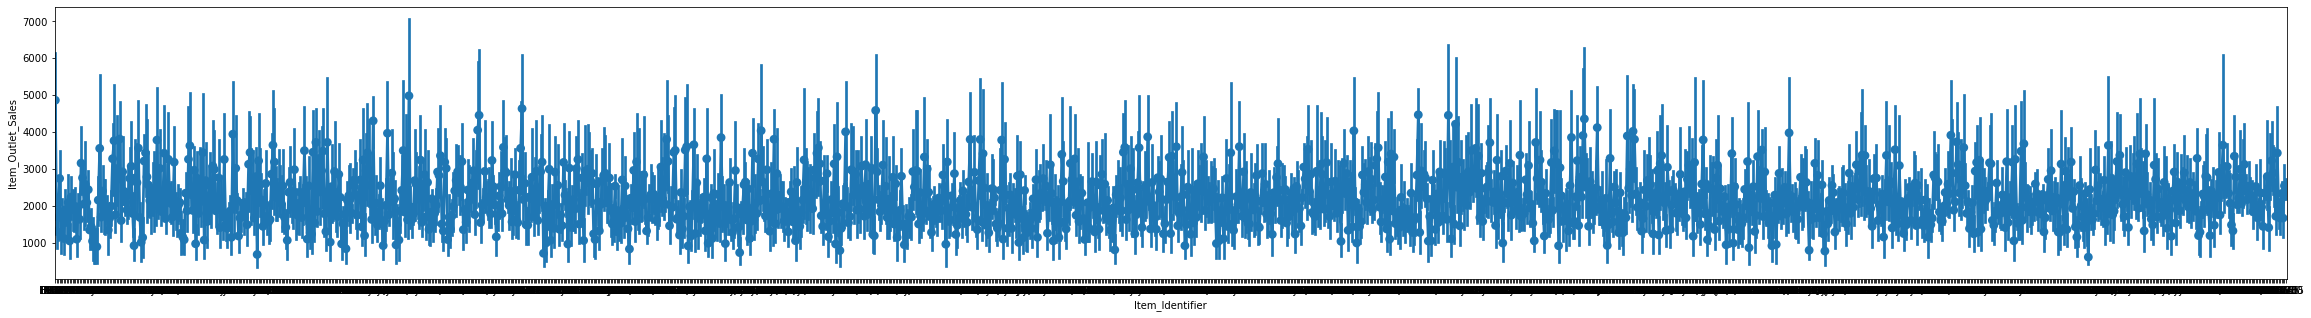

In [15]:
plt.figure(figsize=(40,5))
sns.pointplot(x="Item_Identifier",y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

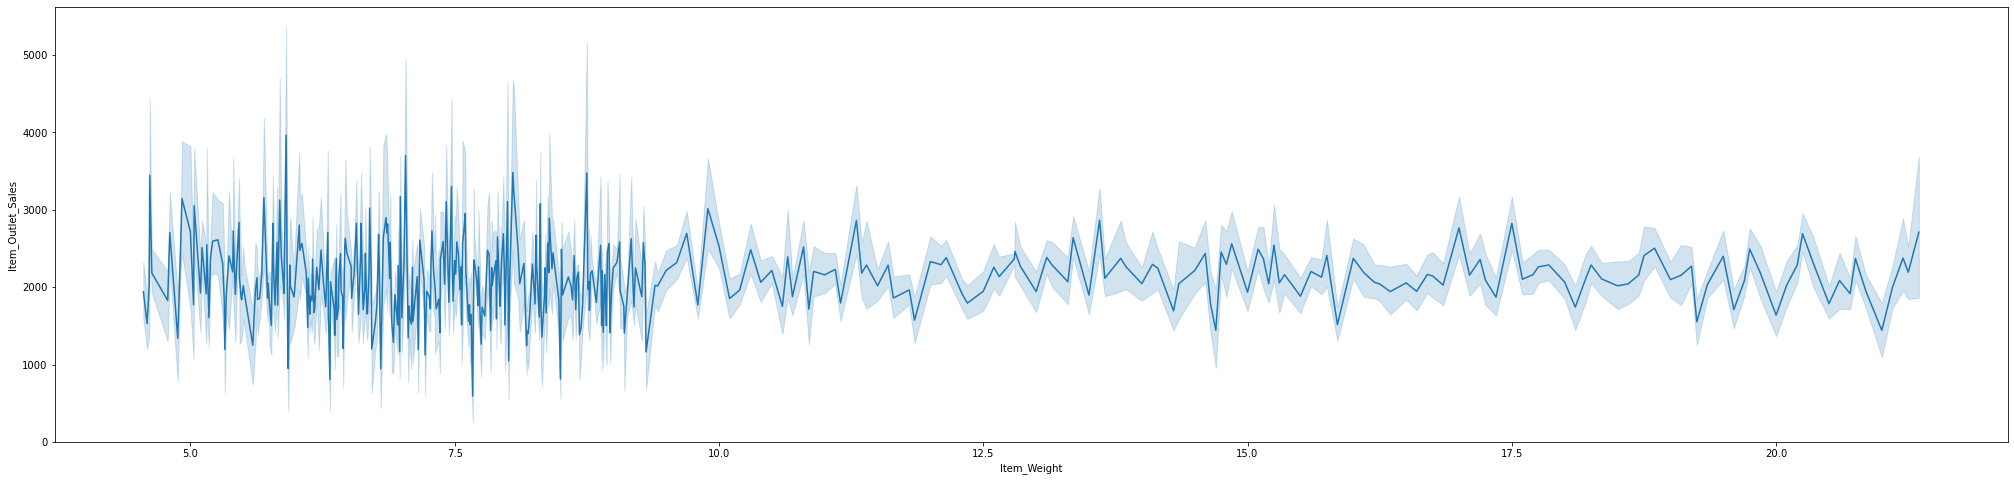

In [16]:
plt.figure(figsize=(35,8))
sns.lineplot(x='Item_Weight',y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

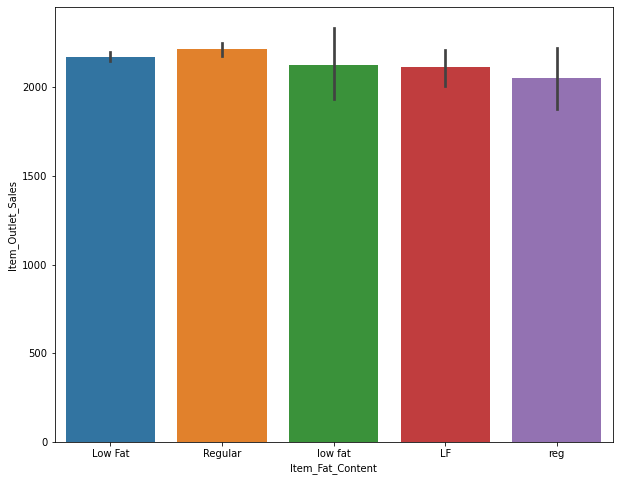

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

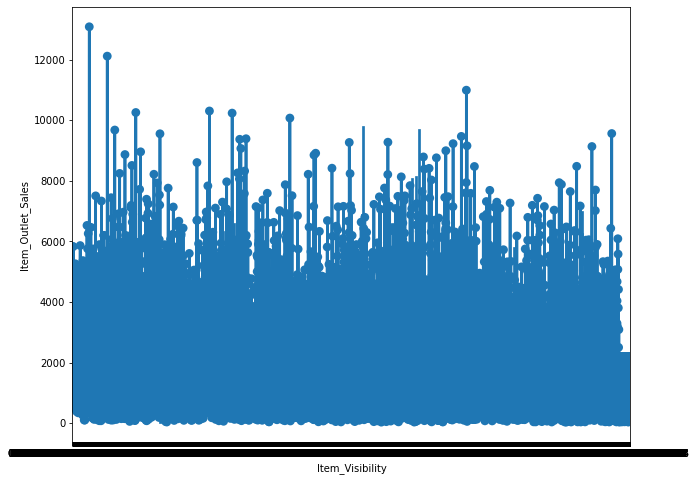

In [18]:
plt.figure(figsize=(10,8))
sns.pointplot(x="Item_Visibility",y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

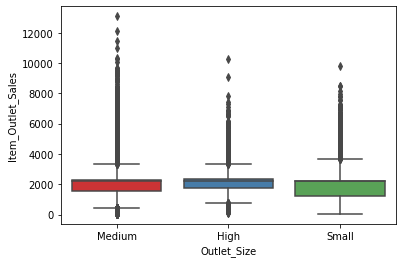

In [19]:
#plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette="Set1")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

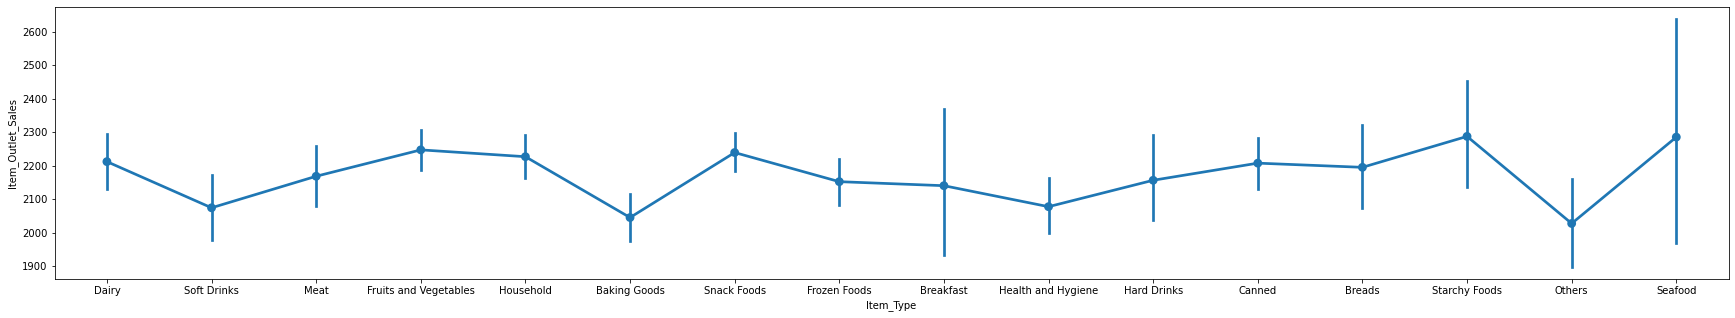

In [20]:
plt.figure(figsize=(30,5))
sns.pointplot(x="Item_Type",y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

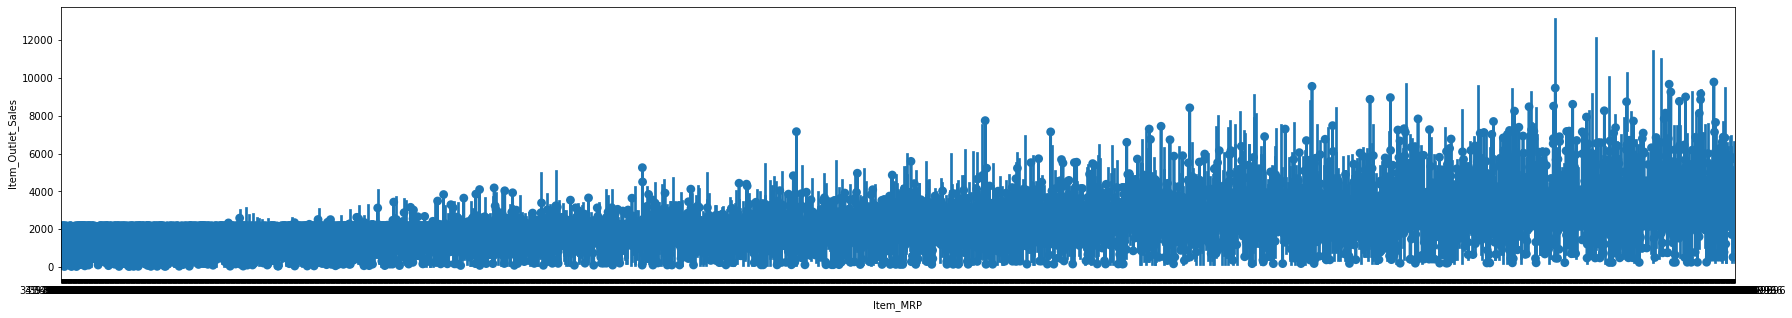

In [21]:
plt.figure(figsize=(30,5))
sns.pointplot(x="Item_MRP",y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

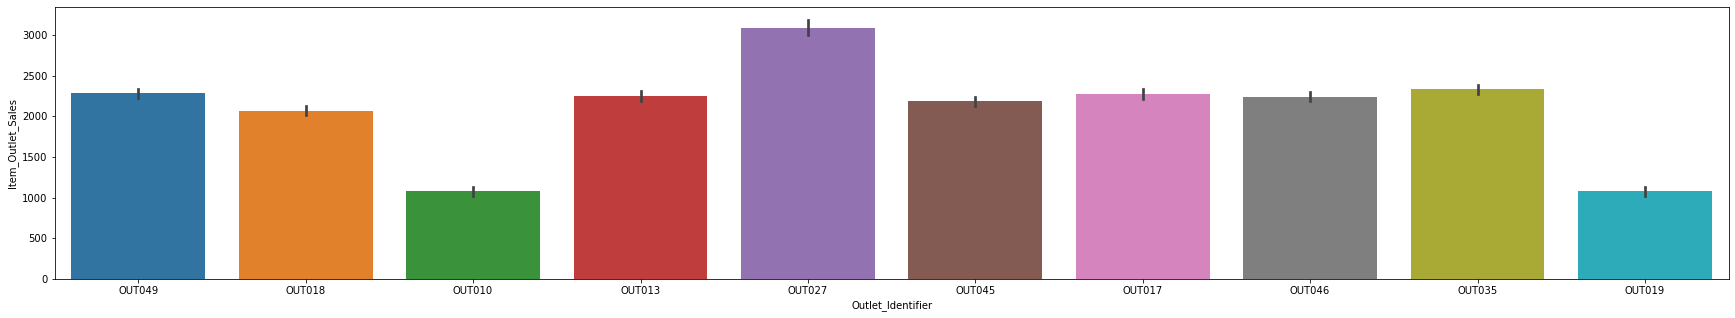

In [22]:
plt.figure(figsize=(30,5))
sns.barplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

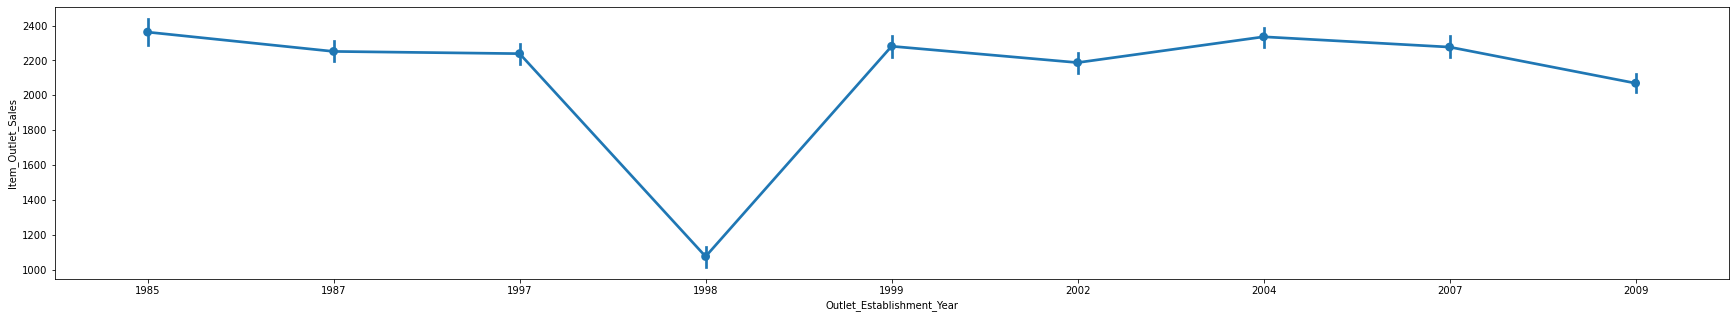

In [23]:
plt.figure(figsize=(30,5))
sns.pointplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

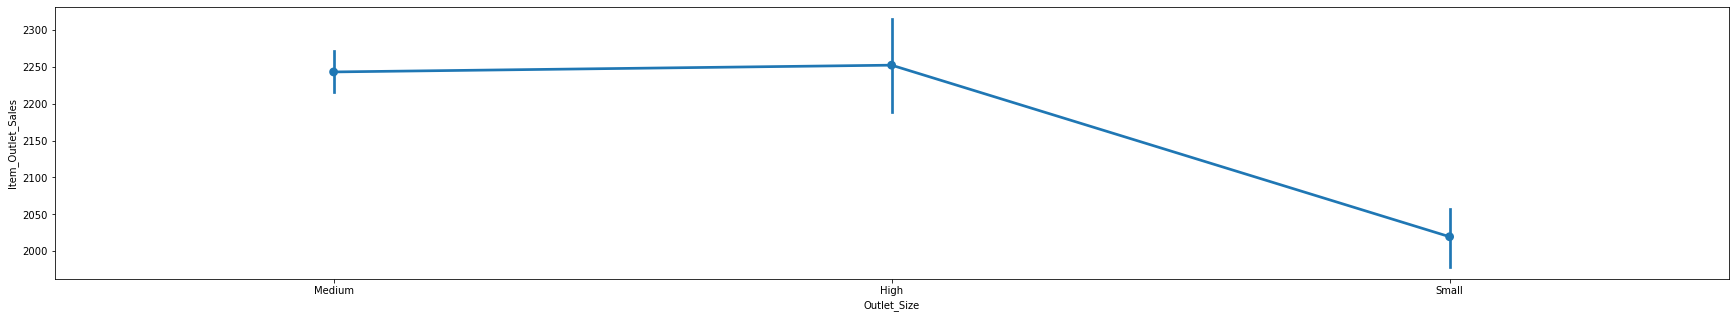

In [24]:
plt.figure(figsize=(30,5))
sns.pointplot(x="Outlet_Size",y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

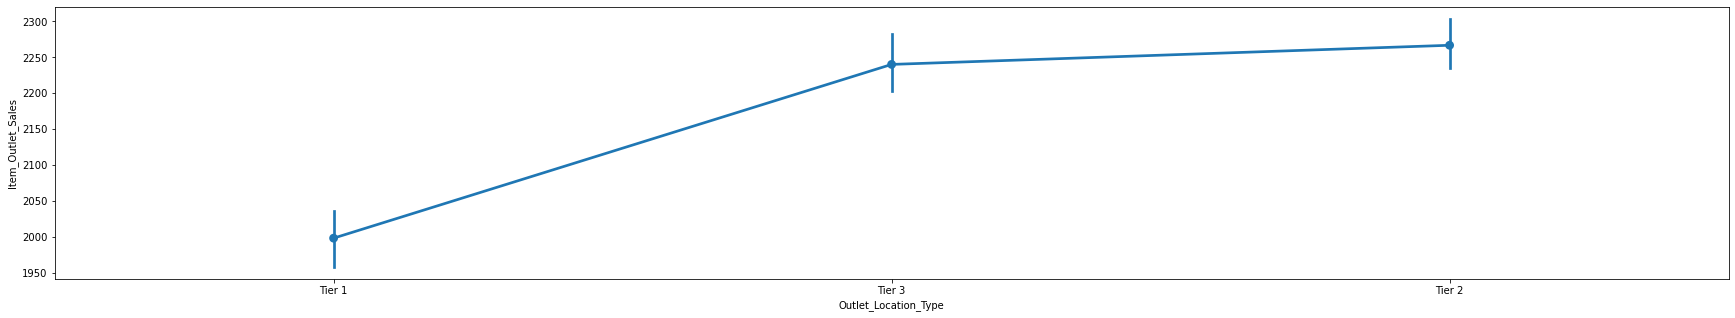

In [25]:
plt.figure(figsize=(30,5))
sns.pointplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

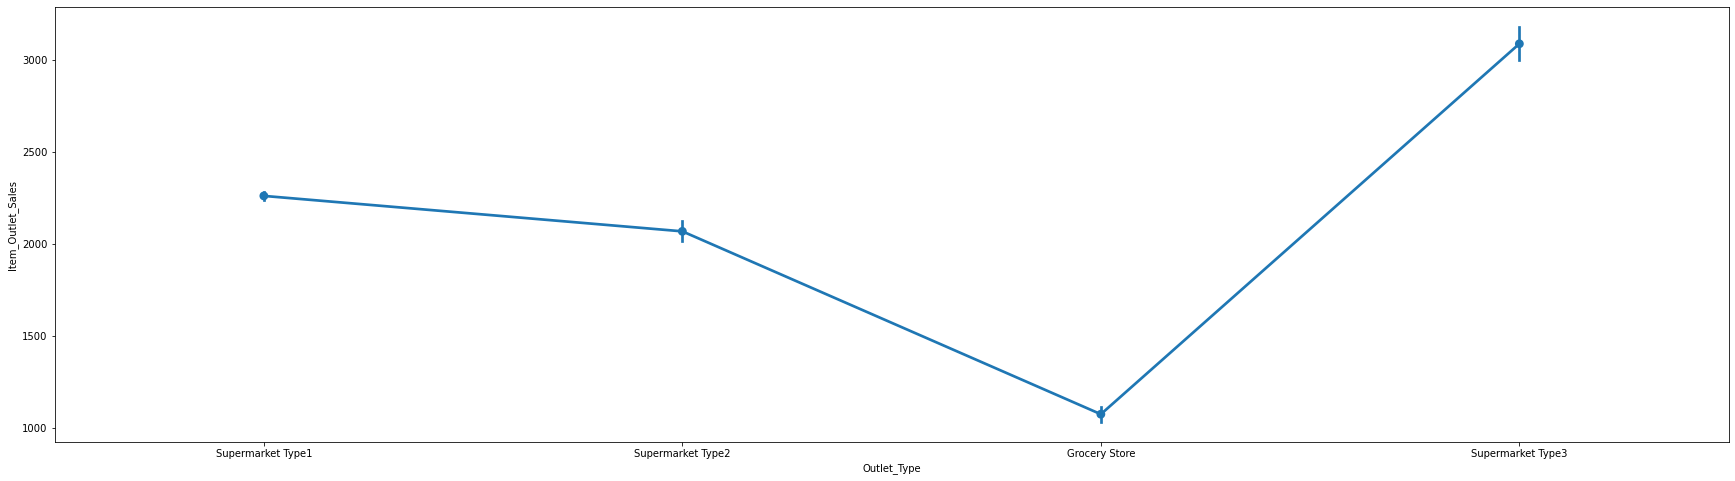

In [26]:
plt.figure(figsize=(30,8))
sns.pointplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df)

# Check The corrletion

In [27]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.013641,0.033002,0.000462,0.008569
Item_Visibility,-0.013641,1.000000,-0.006351,-0.083678,-0.099903
Item_MRP,0.033002,-0.006351,1.000000,0.000141,0.440979
Outlet_Establishment_Year,0.000462,-0.083678,0.000141,1.000000,-0.038061
Item_Outlet_Sales,0.008569,-0.099903,0.440979,-0.038061,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

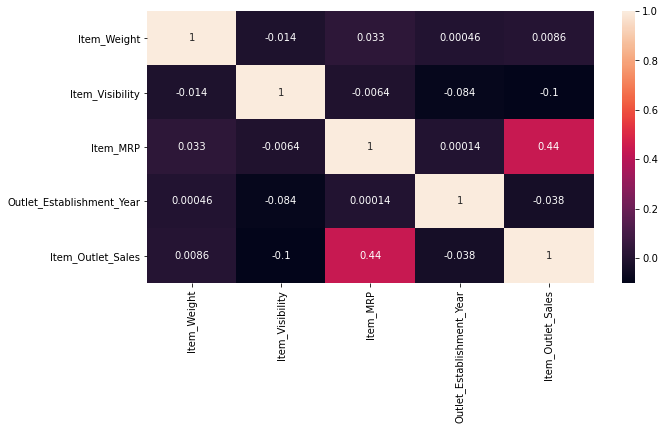

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

<IPython.core.display.Javascript object>

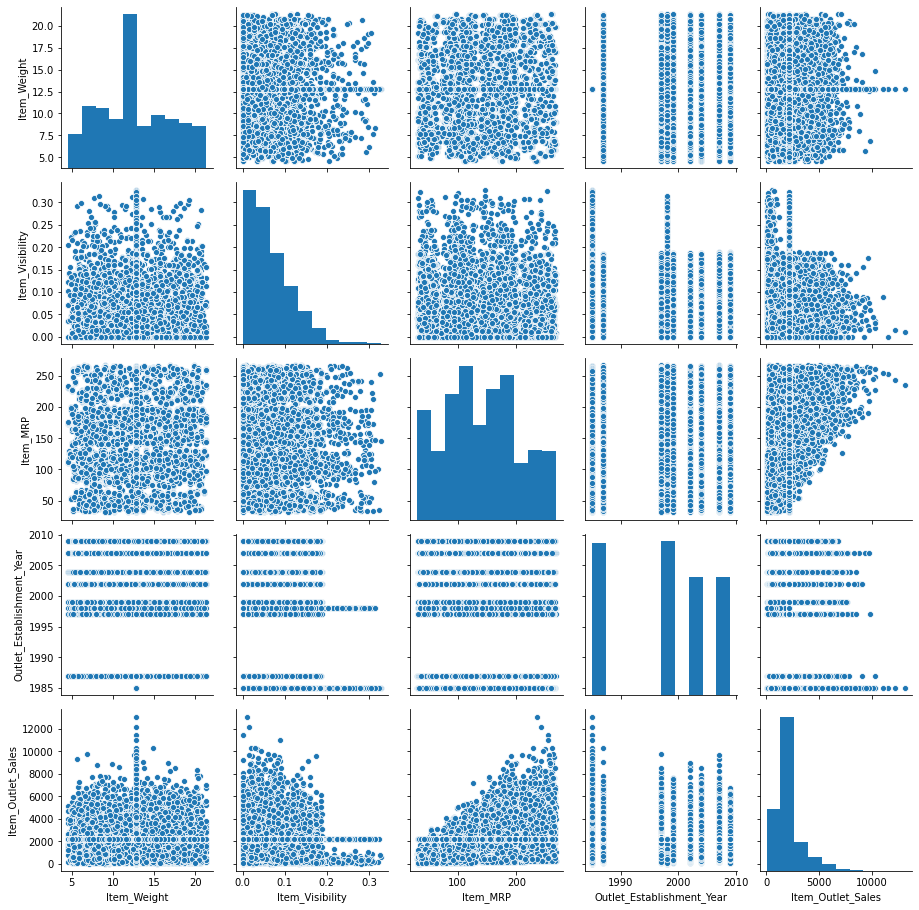

In [29]:
sns.pairplot(df)

<IPython.core.display.Javascript object>

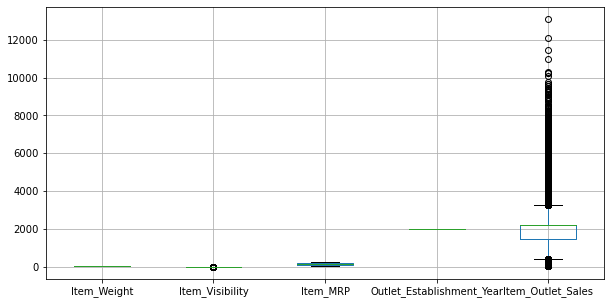

In [30]:
plt.figure(figsize=(10,5))
df.boxplot()

In [31]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=["Outlet_Type","Outlet_Location_Type","Outlet_Identifier","Outlet_Size","Item_Type","Item_Fat_Content","Item_Identifier"]
for i in col:
    le.fit(df[i])
    df[i]=le.fit_transform(df[i])
    


In [33]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([   43,    49,    55,    81,    83,   108,   130,   132,   145,
         146,   151,   174,   199,   203,   240,   243,   275,   276,
         304,   333,   337,   339,   373,   396,   402,   424,   434,
         456,   472,   489,   497,   502,   521,   532,   615,   640,
         641,   661,   694,   727,   753,   753,   809,   838,   844,
         854,   891,   903,   915,   935,   991,   997,  1009,  1010,
        1012,  1034,  1040,  1043,  1067,  1090,  1092,  1113,  1124,
        1127,  1133,  1138,  1159,  1183,  1209,  1254,  1272,  1291,
        1311,  1324,  1348,  1363,  1372,  1393,  1433,  1434,  1450,
        1496,  1501,  1506,  1512,  1542,  1549,  1560,  1564,  1565,
        1575,  1576,  1601,  1611,  1615,  1617,  1627,  1644,  1650,
        1651,  1658,  1669,  1684,  1700,  1705,  1709,  1710,  1723,
        1751,  1753,  1769,  1805,  1821,  1827,  1835,  1841,  1859,
        1879,  1987,  1996,  1998,  2040,  2062,  2088,  2107,  2109,
        2111,  2122

In [35]:
z[43][11]

3.470397772051962

In [36]:
df_new=df[(z<3).all(axis=1)]
print(df.shape,df_new.shape)


(14204, 12) (13589, 12)


In [37]:
df_x=df_new.drop(columns=["Item_Outlet_Sales"])
y=df_new[["Item_Outlet_Sales"]]

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

<IPython.core.display.Javascript object>

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.333333,0.072868,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333
1,0.005135,0.081274,0.666667,0.087538,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.333333,0.076104,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333
3,0.719512,0.871986,0.666667,0.000000,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000
4,0.832478,0.260494,0.333333,0.000000,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
13584,0.149551,0.353974,0.666667,0.061285,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333
13585,0.197689,0.181304,0.666667,0.649293,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667
13586,0.915276,0.324204,0.333333,0.333878,0.533333,0.371199,0.777778,0.708333,0.5,0.5,0.333333
13587,0.334403,0.639774,0.666667,0.000000,0.200000,0.778154,0.222222,0.916667,0.5,0.5,0.333333


In [39]:
print(x.shape,y.shape)

(13589, 11) (13589, 1)


In [40]:
df_new['Item_Outlet_Sales']

0       3735.138000
1        443.422800
2       2097.270000
3        732.380000
4        994.705200
           ...     
5676    2181.288914
5677    2181.288914
5678    2181.288914
5679    2181.288914
5680    2181.288914
Name: Item_Outlet_Sales, Length: 13589, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def maxr2_score(regr,df_x,y):
    max_ran_score=0
    for ran_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = ran_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",ran_state," is ",r2_scr)
        if r2_scr>max_ran_score:
            max_ran_score=r2_scr
            final_ran_state=ran_state
    print("max r2 score corresponding to ",final_ran_state," is ",max_ran_score*100)
    return final_ran_state

In [42]:
#Build a function for cros_val_score
from sklearn.model_selection import cross_val_score
def kfold (model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    cs=model,c_scores.mean()
    print("Mean r2 score for",cs)
    print("standard deviation in r2 score for",model,c_scores.std())
    print(c_scores)

In [43]:
from sklearn.linear_model import LinearRegression
lnrgr=LinearRegression()
maxr2_score(lnrgr,x,y)

r2 score corresponding to  42  is  0.27747926011274904
r2 score corresponding to  43  is  0.30022874834050595
r2 score corresponding to  44  is  0.2851944107924572
r2 score corresponding to  45  is  0.26662111200492433
r2 score corresponding to  46  is  0.27034545309769553
r2 score corresponding to  47  is  0.28049750641961435
r2 score corresponding to  48  is  0.27990927245293373
r2 score corresponding to  49  is  0.28957306685457807
r2 score corresponding to  50  is  0.2539943195874014
r2 score corresponding to  51  is  0.27960337754609066
r2 score corresponding to  52  is  0.2470035070455775
r2 score corresponding to  53  is  0.25954873370445
r2 score corresponding to  54  is  0.26944645852606675
r2 score corresponding to  55  is  0.2732713136417747
r2 score corresponding to  56  is  0.28745426745817904
r2 score corresponding to  57  is  0.2815031215798216
r2 score corresponding to  58  is  0.28966613361126703
r2 score corresponding to  59  is  0.269014809197763
r2 score correspondi

88

In [44]:
kfold(lnrgr,x,y)

Mean r2 score for (LinearRegression(), -1.1440331565950988e+30)
standard deviation in r2 score for LinearRegression() 1.4017254367867172e+30
[ 3.46210603e-01  3.60216951e-01  3.48927764e-01 -2.79651393e+30
 -2.92365185e+30]


In [45]:
from sklearn.ensemble import RandomForestRegressor
rnd=RandomForestRegressor()
maxr2_score(rnd,x,y)

r2 score corresponding to  42  is  0.24639563142311838
r2 score corresponding to  43  is  0.24792297238454797
r2 score corresponding to  44  is  0.24509321608668677
r2 score corresponding to  45  is  0.25602932073127194
r2 score corresponding to  46  is  0.2612785360333082
r2 score corresponding to  47  is  0.2662246904133059
r2 score corresponding to  48  is  0.2694345204713263
r2 score corresponding to  49  is  0.27882119326767596
r2 score corresponding to  50  is  0.2333454349736278
r2 score corresponding to  51  is  0.2757489455583406
r2 score corresponding to  52  is  0.23681865428128968
r2 score corresponding to  53  is  0.2502190397087335
r2 score corresponding to  54  is  0.25120713446624665
r2 score corresponding to  55  is  0.26520539177728075
r2 score corresponding to  56  is  0.2750347229256296
r2 score corresponding to  57  is  0.25823114613880394
r2 score corresponding to  58  is  0.25570765078892
r2 score corresponding to  59  is  0.24683072851514432
r2 score correspondi

88

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
kc=KNeighborsRegressor()

neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 29}

In [47]:
knn=KNeighborsRegressor(n_neighbors=29)
maxr2_score(knn,x,y)

r2 score corresponding to  42  is  0.3050178825596692
r2 score corresponding to  43  is  0.30509649388055904
r2 score corresponding to  44  is  0.3016339851404324
r2 score corresponding to  45  is  0.3107612067053489
r2 score corresponding to  46  is  0.31171892919317146
r2 score corresponding to  47  is  0.3193756187630198
r2 score corresponding to  48  is  0.3092590175853499
r2 score corresponding to  49  is  0.31405525940321366
r2 score corresponding to  50  is  0.2815873536109398
r2 score corresponding to  51  is  0.3116010805535322
r2 score corresponding to  52  is  0.2824733087130743
r2 score corresponding to  53  is  0.29741923664973047
r2 score corresponding to  54  is  0.3029299418339698
r2 score corresponding to  55  is  0.2983107563509845
r2 score corresponding to  56  is  0.3206705585436408
r2 score corresponding to  57  is  0.3052466752031898
r2 score corresponding to  58  is  0.314204918647772
r2 score corresponding to  59  is  0.301091273691401
r2 score corresponding to 

96

In [48]:
kfold(knn,x,y)

Mean r2 score for (KNeighborsRegressor(n_neighbors=29), -1.1049477833573341e+30)
standard deviation in r2 score for KNeighborsRegressor(n_neighbors=29) 1.353449402406316e+30
[ 3.58300602e-01  3.79434368e-01  3.66220556e-01 -2.72842543e+30
 -2.79631349e+30]


In [49]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
ls=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
lgd=GridSearchCV(ls,parameters,cv=5,scoring="r2")
lgd.fit(x,y)
lgd.best_params_

{'alpha': 1}

In [50]:
ls=Lasso(alpha=1)
maxr2_score(ls,x,y)

r2 score corresponding to  42  is  0.27756700597880046
r2 score corresponding to  43  is  0.2994940132642562
r2 score corresponding to  44  is  0.2860706277564863
r2 score corresponding to  45  is  0.2665506740619259
r2 score corresponding to  46  is  0.2701379054974442
r2 score corresponding to  47  is  0.27972421396387304
r2 score corresponding to  48  is  0.27989496082228515
r2 score corresponding to  49  is  0.28870202171296444
r2 score corresponding to  50  is  0.2552278162708267
r2 score corresponding to  51  is  0.2800085064779956
r2 score corresponding to  52  is  0.24790921069397442
r2 score corresponding to  53  is  0.25915438966177196
r2 score corresponding to  54  is  0.26980456908280837
r2 score corresponding to  55  is  0.27338008683932935
r2 score corresponding to  56  is  0.28744105906452877
r2 score corresponding to  57  is  0.28204360193281586
r2 score corresponding to  58  is  0.28855214501172277
r2 score corresponding to  59  is  0.26958170037031415
r2 score corresp

88

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rd=Ridge()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
rgd=GridSearchCV(rd,parameters,cv=5,scoring="r2")
rgd.fit(x,y)
rgd.best_params_

{'alpha': 1}

In [52]:
rd=Ridge(alpha=1)
maxr2_score(rd,x,y)

r2 score corresponding to  42  is  0.2774775183539129
r2 score corresponding to  43  is  0.30021408374712455
r2 score corresponding to  44  is  0.28521468861112076
r2 score corresponding to  45  is  0.26662829147254186
r2 score corresponding to  46  is  0.2703636910925755
r2 score corresponding to  47  is  0.28049380561437554
r2 score corresponding to  48  is  0.27988712524118065
r2 score corresponding to  49  is  0.28954027926783454
r2 score corresponding to  50  is  0.25407949466930824
r2 score corresponding to  51  is  0.2796011365796284
r2 score corresponding to  52  is  0.24709441992355863
r2 score corresponding to  53  is  0.25957183000121153
r2 score corresponding to  54  is  0.2694674833060642
r2 score corresponding to  55  is  0.2732737562268961
r2 score corresponding to  56  is  0.2874261877163805
r2 score corresponding to  57  is  0.28154104962929705
r2 score corresponding to  58  is  0.28961440572501074
r2 score corresponding to  59  is  0.2690415505146977
r2 score correspo

88

In [53]:
kfold(ls,x,y)


Mean r2 score for (Lasso(alpha=1), -1.1220986323662292e+30)
standard deviation in r2 score for Lasso(alpha=1) 1.3748264158946867e+30
[ 3.42347559e-01  3.56761553e-01  3.45528638e-01 -2.74422071e+30
 -2.86627245e+30]


In [54]:
kfold(rd,x,y)

Mean r2 score for (Ridge(alpha=1), -1.1407788012704798e+30)
standard deviation in r2 score for Ridge(alpha=1) 1.3977381262799246e+30
[ 3.45861982e-01  3.59872934e-01  3.48613187e-01 -2.78855419e+30
 -2.91533982e+30]


In [55]:
from sklearn.linear_model import ElasticNet

es=ElasticNet()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
lgd=GridSearchCV(es,parameters,cv=5,scoring="r2")
lgd.fit(x,y)
lgd.best_params_


{'alpha': 1}

In [56]:
esl=ElasticNet(alpha=1)
maxr2_score(esl,x,y)

r2 score corresponding to  42  is  0.06241741775754117
r2 score corresponding to  43  is  0.06655970308359926
r2 score corresponding to  44  is  0.06628400862195194
r2 score corresponding to  45  is  0.0638394408491968
r2 score corresponding to  46  is  0.06445603545587608
r2 score corresponding to  47  is  0.06415366007612211
r2 score corresponding to  48  is  0.06286052002198039
r2 score corresponding to  49  is  0.06520929137323772
r2 score corresponding to  50  is  0.06272198881991442
r2 score corresponding to  51  is  0.0642217120432711
r2 score corresponding to  52  is  0.06308135228566258
r2 score corresponding to  53  is  0.06280586097643626
r2 score corresponding to  54  is  0.06340752979479747
r2 score corresponding to  55  is  0.06300885386011223
r2 score corresponding to  56  is  0.06510395496097854
r2 score corresponding to  57  is  0.0651562590441167
r2 score corresponding to  58  is  0.06330528825922666
r2 score corresponding to  59  is  0.06269612469336772
r2 score corr

95

In [57]:
kfold(esl,x,y)

Mean r2 score for (ElasticNet(alpha=1), -3.5033795141054235e+28)
standard deviation in r2 score for ElasticNet(alpha=1) 4.292849081732334e+28
[ 5.20385112e-02  5.61193408e-02  5.25243979e-02 -8.54601521e+28
 -8.97088236e+28]


In [58]:
from sklearn.tree import DecisionTreeRegressor
dct=DecisionTreeRegressor()
parameters={"criterion":["mse","friedman_mse","mae"],"min_samples_leaf":[1,2,3,4,5,6]}
lgd=GridSearchCV(dct,parameters,cv=5,scoring="r2")
lgd.fit(x,y)
lgd.best_params_

{'criterion': 'mae', 'min_samples_leaf': 6}

In [59]:
dct_n=DecisionTreeRegressor(criterion='mae',min_samples_leaf=6)
maxr2_score(dct_n,x,y)

r2 score corresponding to  42  is  0.05288016849991861
r2 score corresponding to  43  is  0.05963582258856859
r2 score corresponding to  44  is  0.042366632235294244
r2 score corresponding to  45  is  0.038272765884771576
r2 score corresponding to  46  is  0.060840839237236155
r2 score corresponding to  47  is  0.069193816290401
r2 score corresponding to  48  is  0.059658473668546486
r2 score corresponding to  49  is  0.06677514047384747
r2 score corresponding to  50  is  0.03925452765337778
r2 score corresponding to  51  is  0.05517973783636421
r2 score corresponding to  52  is  0.03722437944582524
r2 score corresponding to  53  is  0.078379684321089
r2 score corresponding to  54  is  0.061468104170844584
r2 score corresponding to  55  is  0.05839312737514457
r2 score corresponding to  56  is  0.0761009102063338
r2 score corresponding to  57  is  0.06776023636876938
r2 score corresponding to  58  is  0.07654418117720263
r2 score corresponding to  59  is  0.05317714060237544
r2 score c

93

How ever we are not got the best accuracy after applying all algorithms

In [60]:
 kfold(dct_n,x,y)

Mean r2 score for (DecisionTreeRegressor(criterion='mae', min_samples_leaf=6), -2.007983828551808e+30)
standard deviation in r2 score for DecisionTreeRegressor(criterion='mae', min_samples_leaf=6) 2.4599337229563167e+30
[ 3.83994137e-02  1.32480879e-01  4.18758875e-02 -5.11044904e+30
 -4.92947010e+30]


In [61]:
knn=KNeighborsRegressor(n_neighbors=29)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 68,test_size=0.20)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [62]:
#Lets find the rmse and r2_score using sklearn.metrics forKNN Regressor model
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r2_score is: ",r2_score(y_test,y_pred)*100)

MSE is:  885012.7826349667
r2_score is:  31.728404121555965


In [64]:
#Lets save the model using joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(knn, 'Bigmart_sales.pkl')

['Bigmart_sales.pkl']